In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats, integrate

In [6]:
df = pd.read_csv('customers.csv')

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Метод максимального правдоподобия

## Norm одна для всех

In [4]:
def pe_norm(x, version):
    """
    Функция использует входящую выборку в виде списка или массива numpy
    Выбор версии определяет возвращаемые функцией значения
    Т.к. в работе были получены одни и те же зависимости для ТО МО нормальнго
    распределения по ММП, ММ, МНК, то используем одну функцию
    """
    m = (1/len(x)) * sum(x)
    sum_sq = 0
    for i in x:
        sum_sq += (i - m) ** 2
    d_adj = sum_sq / (len(x) - 1)
    sigma_m = d_adj / len(x)
    sigma_d = 2 * ((d_adj) ** 2) / len(x)
    if version == 'both':
        return m, d_adj, sigma_m, sigma_d
    elif version == 'm_full':
        return m, sigma_m
    elif version == 'd_full':
        return d_adj, sigma_d
    elif version == 'm':
        return m
    elif version == 'd':
        return d_adj
    elif version == 'm_d':
        return m, d_adj

In [96]:
x = stats.norm.rvs(loc=200, scale=15, size=50)
y = stats.norm.rvs(loc=190, scale=10, size=50)
z = stats.norm.rvs(loc=210, scale=13, size=50)
print('Точечная оценка первой группы: ', pe_norm(x, 'm'))
print('Точечная оценка второй группы: ', pe_norm(y, 'm'))
print('Точечная оценка третьей группы: ', pe_norm(z, 'm'))
print('')
print('Первая группа:')
print(ie_m_norm(x, 0.95))
print('Вторая группа:')
print(ie_m_norm(y, 0.95))
print('Третья группа:')
print(ie_m_norm(z, 0.95))
print('')
print('Наиболее точные значения после теста гипотез:')
print('Первая группа')
hypothesis_mo(x, 0.05, 199.65)
print('Вторая группа')
hypothesis_mo(y, 0.05, 191.83)
print('Третья группа')
hypothesis_mo(z, 0.05, 209.78)
print('')
kramer_test_adj(x, 0.05)
kramer_test_adj(y, 0.05)
kramer_test_adj(z, 0.05)


Точечная оценка первой группы:  200.43184811054587
Точечная оценка второй группы:  190.86126900253166
Точечная оценка третьей группы:  211.1104224019011

Первая группа:
Доверительный интервал с вероятностью  0.95  для МО: [ 194.9427 ; 205.921 ]
(194.942659340171, 205.92103688092075)
Вторая группа:
Доверительный интервал с вероятностью  0.95  для МО: [ 186.8894 ; 194.8331 ]
(186.88939707247286, 194.83314093259045)
Третья группа:
Доверительный интервал с вероятностью  0.95  для МО: [ 202.9462 ; 219.2747 ]
(202.94616971472226, 219.27467508907995)

Наиболее точные значения после теста гипотез:
Первая группа
z = 0.4731 ≤ z_cr = 1.6766 
Принимаем гипотезу МО = 199.65 с доверительной вероятностью  0.95
Вторая группа
z = -0.6891 ≤ z_cr = 1.6766 
Принимаем гипотезу МО = 191.83 с доверительной вероятностью  0.95
Третья группа
z = 0.6601 ≤ z_cr = 1.6766 
Принимаем гипотезу МО = 209.78 с доверительной вероятностью  0.95

G = 0.1855 ≤ G_cr = 0.348 
Принимаем гипотезу f(x) ~ Norm с доверительной вер

In [97]:
x = stats.norm.rvs(loc=200, scale=10, size=150)
x

array([197.1040598 , 202.89863923, 223.41818534, 187.75844544,
       186.29825922, 181.48881097, 175.30221984, 186.07227578,
       185.38866334, 197.59829935, 206.78693435, 201.77340556,
       210.10943232, 201.42923901, 189.97516605, 201.89557581,
       200.39682098, 199.7917324 , 190.2666339 , 198.46869322,
       192.61229666, 200.81304108, 212.44467481, 201.7197495 ,
       209.71098148, 183.17614446, 202.03860627, 190.3854675 ,
       210.5249711 , 181.3062464 , 213.7068835 , 209.0637023 ,
       191.12775173, 197.94804132, 183.90137128, 215.94761922,
       192.20353038, 208.9742333 , 188.94770694, 207.92993281,
       205.0238567 , 210.01656156, 203.61054776, 174.39529267,
       217.23074575, 211.18672036, 191.85770885, 192.73533675,
       186.74504135, 204.11792718, 193.37033857, 208.47487923,
       210.62650643, 198.88086577, 210.88168547, 200.36116237,
       181.62986219, 213.33173266, 187.31064047, 201.84289436,
       202.21349977, 211.54135869, 199.05868024, 204.63

In [101]:
import random
y = []
for i in x:
    if ((i > 170) & (i <= 180)):
        y.append(random.uniform(15, 20))
    elif ((i > 180) & (i <= 190)):
        y.append(random.uniform(18, 24))
    elif ((i > 190) & (i <= 200)):
        y.append(random.uniform(17, 29))
    elif ((i > 200) & (i <= 210)):
        y.append(random.uniform(25, 38))
    elif (i > 210):
        y.append(random.uniform(25, 45))

In [102]:
y

[25.583671723730344,
 25.662884820504008,
 25.191198174232316,
 18.527912030402543,
 22.435282936270085,
 22.79206190687176,
 16.060969188914598,
 20.701805842142324,
 21.318281074740977,
 21.666416617453784,
 31.08509251330532,
 30.00904966205296,
 25.561916344307157,
 37.36905480478033,
 23.26680275981924,
 34.61252156828775,
 33.97035596237741,
 26.046107483557485,
 22.842916769339137,
 20.102369272898564,
 19.154418718983983,
 32.008079714247295,
 34.77381737054607,
 34.283172683192525,
 30.80661854001636,
 23.823397868473965,
 29.86884415666895,
 28.685456627633386,
 34.75760272477113,
 18.946161627886287,
 41.3869203348173,
 28.65216910795047,
 24.04360681342677,
 22.57161725974585,
 21.701162345923613,
 26.419864230533697,
 27.178310875969835,
 35.31797415898686,
 18.607961164245747,
 26.59631214408969,
 32.28358311130775,
 44.95110095787524,
 25.28670629332267,
 18.71649152353282,
 35.85607976588928,
 42.09587537700608,
 26.5955639226179,
 25.307835626874198,
 23.87870593450736

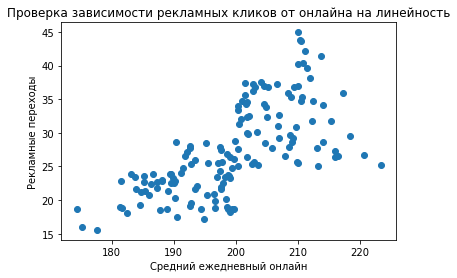

In [117]:
plt.scatter(x, y)
plt.ylabel('Рекламные переходы')
plt.xlabel('Средний ежедневный онлайн')
plt.title('Проверка зависимости рекламных кликов от онлайна на линейность')
plt.savefig('one.png', dpi=400, bbox_inches='tight')
plt.show()

In [145]:
z = []
for i in y:
    if (i <= 20):
        z.append(random.uniform(25, 34))
    elif ((i > 20) & (i <= 23)):
        z.append(random.uniform(27, 49))
    elif ((i > 23) & (i <= 28)):
        z.append(random.uniform(23, 49))
    elif ((i > 28) & (i <= 32)):
        z.append(random.uniform(24, 58))
    elif ((i > 32) & (i <= 34)):
        z.append(random.uniform(33, 70))
    elif (i > 34):
        z.append(random.uniform(39, 68))
z

[43.985102317165506,
 24.40850159713179,
 26.106340333890962,
 29.796515058585726,
 30.550908756001682,
 43.77214980766216,
 30.05159955046096,
 36.05885221585401,
 34.50326521179181,
 32.92172241900354,
 55.15801096936636,
 50.46641356474797,
 48.976049643483364,
 66.59394113945613,
 40.57050243708869,
 62.457419845338705,
 44.78519376838849,
 35.32191858488064,
 31.454295975052815,
 38.183583044439054,
 31.742914966209575,
 40.622934882034166,
 43.144601351499624,
 42.599494261469445,
 33.242586822294136,
 40.40150350393105,
 31.29001044605252,
 43.64785283085844,
 56.23422161193572,
 33.44978656313729,
 53.83403856480877,
 42.89113629649502,
 40.53512236178057,
 36.38915613523168,
 33.15489971848512,
 47.698605209088264,
 31.48060312650683,
 60.45302285971144,
 33.22308768885763,
 47.45371788840217,
 33.06895096571347,
 46.330953664280564,
 29.039663594264496,
 29.912327855325163,
 62.8805117382004,
 66.3104833474072,
 30.824503867336237,
 23.97593185125253,
 33.12594220992969,
 63.

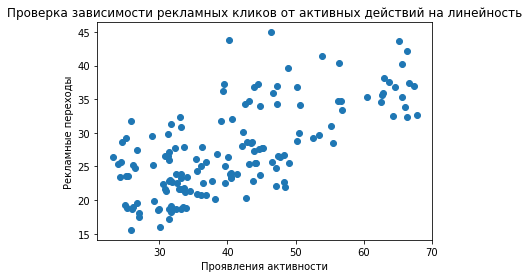

In [146]:
plt.scatter(z, y)
plt.ylabel('Рекламные переходы')
plt.xlabel('Проявления активности')
plt.title('Проверка зависимости рекламных кликов от активных действий на линейность')
plt.savefig('two.png', dpi=400, bbox_inches='tight')
plt.show()

In [147]:
df = []
for i in range(150):
    df.append([x[i], z[i], y[i]])
columns = ['online', 'activity', 'adv_click']
df = pd.DataFrame(df, columns=columns)

In [148]:
df

,online,activity,adv_click
0,197.104060,43.985102,25.583672
1,202.898639,24.408502,25.662885
2,223.418185,26.106340,25.191198
3,187.758445,29.796515,18.527912
4,186.298259,30.550909,22.435283
...,...,...,...
145,194.479899,31.464952,18.655308
146,205.236974,50.165700,36.854473
147,204.631431,47.217527,34.273354
148,215.364804,25.859676,31.747035


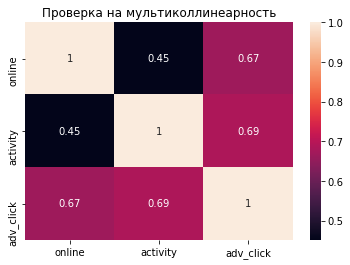

In [150]:
sns.heatmap(df.corr(), annot=True)
plt.title('Проверка на мультиколлинеарность')
plt.savefig('corr_adv.png', dpi=400, bbox_inches='tight')


In [172]:
model, group = mult_linregr(df, ['online', 'activity'], 'adv_click')
aa = np.array(test_model(df, 'adv_click', model, group, 0.1))

y_model = -43.147 + (0.298online) + (0.27activity)
F = 124.8279 > F_cr = 2.339 : passed
R_2adj = 0.6267 : passed


In [180]:
aa = stats.norm.rvs(loc=200, scale=10, size=150)
kramer_test_adj(aa, 0.1)

G = 0.2412 ≤ G_cr = 0.316 
Принимаем гипотезу f(x) ~ Norm с доверительной вероятностью  0.9
G = 3.6686 > G_cr = 0.316 
Отклоняем гипотезу f(x) ~ Exp
G = 0.4495 > G_cr = 0.316 
Отклоняем гипотезу f(x) ~ R


F = 39.73852110377496 , p-value = 1.5987211554602254e-14


(39.73852110377496, 1.5987211554602254e-14)

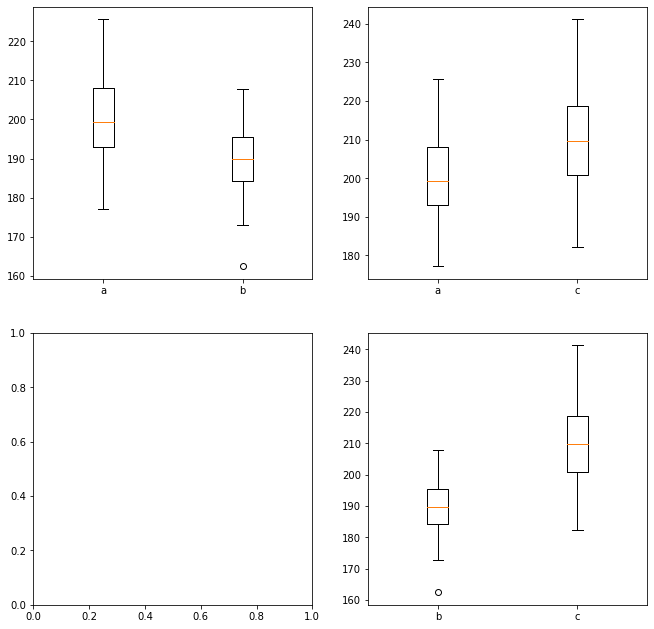

In [92]:
df = []
for i in range(50):
    df.append(['a', x[i]])
for i in range(50):
    df.append(['b', y[i]])
for i in range(50):
    df.append(['c', z[i]])
columns = ['group', 'value']
df = pd.DataFrame(df, columns=columns)
one_way_anova(df, 'group', 'value')

In [80]:
def pe_r_mmp(x):
    """
    Оцениваем границы, на вход выборка в виде массива numpy или списка
    Возвращаем оценки границ распределения
    """
    a = x.min()
    b = x.max()
    return a, b
x = stats.uniform.rvs(1, 7, 50)
pe_r_mmp(x)

(1.4166961571964218, 7.949782646156178)

In [81]:
x = stats.uniform.rvs(1, 7, 50)
pe_r_mmp(x)

(1.0328853502486128, 7.990654625045259)

In [367]:
def pe_exp_mmp(x, T, n):
    """
    Оцениваем параметр лямбда, на вход выборка значений не появившихся событий в виде массива numpy или списка,
    период, количество не появившихся событий
    Возвращаем оценки границ распределения
    """
    s = sum(x) + n * T
    pe_lambda = len(x) / s
    sigma_l = pe_lambda ** 2 / len(x)
    return pe_lambda, sigma_l

In [368]:
pe_exp_mmp([0.96, 0.8, 0.65, 0.7], 1, 6)

(0.43907793633369924, 0.04819735854376501)

# Метод моментов

In [77]:
def pe_r_mm(x, version='def'):
    """
    Оцениваем границы, на вход выборка в виде массива numpy или списка и версия
    Возвращаем оценки границ распределения и погрешность
    """
    a = x.mean() - (3 * x.var()) ** (1 / 2)
    b = x.mean() + (3 * x.var()) ** (1 / 2)
    sigma = x.var() / len(x) + (3 * (x.var() ** 2) / len(x)) / (4 * x.var())
    if version == 'for_adj':
        return a, b
    else:
        return a, b, sigma
x = stats.uniform.rvs(1, 7, 50)
pe_r_mm(x)

(0.5602148031111707, 8.04887064890188, 0.16356656859869484)

In [78]:
def pe_exp_mm(x, method='m'):
    """
    Оцениваем параметр лямбда, на вход выборка в виде массива numpy или списка
    и метод поиска
    Возвращаем оценки границ распределения
    """
    if method == 'd':
        pe_lambda = 1 / (x.var()) ** (1 / 2)
        sigma_l = (x.var() ** 2) / (n * 4 * x.var() ** 3)
    pe_lambda = 1 / x.mean()
    sigma_l = (x.var() / len(x)) / (x.mean() ** 4)
    return pe_lambda, sigma_l

In [370]:
pe_exp_mm(np.array([0.96, 0.8, 0.65, 0.7, 1, 1, 1, 1, 1, 1]), 'm')

(1.0976948408342482, 0.002539168196647351)

# Интервальное оценивание

In [13]:
head = ['p', 'q']
data = [
    [90, 1.282],
    [95, 1.645],
    [99, 2.326]
]
table_norm = pd.DataFrame(data, columns=head)

# MO

In [32]:
def ie_m_norm(x, p):
    """
    На вход выборка и доверительная вероятность
    Возвращает левую и правую границу ДИ
    """
    m, sigma = pe_norm(x, 'm_full')
    q = stats.t.ppf((1 + p)/2, len(x) - 1)
    m_l = m - q * sigma
    m_r = m + q * sigma
    print('Доверительный интервал с вероятностью ',p, ' для МО: [', 
          round(m_l, 4), ';', round(m_r, 4), ']')
    return m_l, m_r
ie_m_norm(stats.norm.rvs(loc=200, scale=15, size=150), 0.99)

Доверительный интервал с вероятностью  0.99  для МО: [ 193.7775 ; 201.7295 ]


(193.7774555778678, 201.72946352763356)

# Disper

In [385]:
def ie_d_norm(x, p_l, p_r):
    """
    На вход выборка и вероятности для левой и правой границы
    Возвращает левую и правую границу ДИ
    """
    d = pe_norm(x, 'd')
    q_l = stats.chi2.ppf(p_l, len(x) - 1)
    q_r = stats.chi2.ppf(p_r, len(x) - 1)
    d_l = (len(x) * d) / q_r
    d_r = (len(x) * d) / q_l
    print('Доверительный интервал при общей вероятности ', round(p_r - p_l, 2), ' для Дисперсии : [', round(d_l, 4), ';', round(d_r, 4), ']')
    return d_l, d_r
ie_d_norm(stats.norm.rvs(loc = 5, scale = 1.44, size = 50), 0.05, 0.95)

Доверительный интервал при общей вероятности  0.9  для Дисперсии : [ 1.455 ; 2.8447 ]


(1.4549683755108587, 2.8446733505705097)

In [17]:
l, r = ie_d_norm(df.Age, 0.05, 0.95 )

Доверительный интервал при общей вероятности  0.8999999999999999  для Дисперсии : [ 167.55969220241334 ; 233.18834289123268 ]


# KK

In [18]:
df.Age.corr(df.CustomerID)

-0.02676288945786289

In [387]:
def ie_corr(df, x, y, d):
    """
    На вход фрейм, две сравниваемых перменных и общая вероятность
    Возвращает левую и правую границу ДИ
    """
    p = (d + 1) / 2
    corr = df[x].corr(df[y])
    m = 0.5 * math.log((1 + corr) / (1 - corr))
    m_m = m + corr / (2 * (len(df[x]) - 1))
    sigma_m = (1 / (len(df[x]) - 3)) ** (1 / 2)
    q = stats.norm.ppf(p)
    m_l = m_m - q * sigma_m
    m_r = m_m + q * sigma_m
    r_l = -(1 - math.exp(2 * m_l)) / (1 + math.exp(2 * m_l))
    r_r = -(1 - math.exp(2 * m_r)) / (1 + math.exp(2 * m_r))
    print('Доверительный интервал при общей вероятности ', d, ' для KK : [', 
          round(r_l, 4), ';', round(r_r, 4), ']')
ie_corr(df_corr, 'x', 'y', 0.9)

Доверительный интервал при общей вероятности  0.9  для KK : [ 0.8929 ; 0.9906 ]


In [386]:
data = [
    [-0.5, -0.2],
    [1.2, 1],
    [0.7, 0.8],
    [-1.5, -1],
    [-2.2, -1.5],
    [-0.5, -0.7],
    [1.8, 2],
    [0.3, 0.5],
    [-0.8, -1.2],
    [1, 1.3]
]
head = ['x', 'y']
df_corr = pd.DataFrame(data, columns=head)
df_corr

,x,y
0,-0.5,-0.2
1,1.2,1.0
2,0.7,0.8
3,-1.5,-1.0
4,-2.2,-1.5
5,-0.5,-0.7
6,1.8,2.0
7,0.3,0.5
8,-0.8,-1.2
9,1.0,1.3


In [107]:
ie_corr(df_corr, 'x', 'y', 0.9)

Доверительный интервал при общей вероятности  0.9  для KK : [ 0.8929 ; 0.9906 ]


# Tolerant

In [392]:
def tolerant(x, p, g):
    """
    Вход - выборка, доверительная вероятность и доля совокупности ГС
    Возвращает границы интервала
    """
    m, std = pe_norm(x, 'm_d')
    std **= 1 / 2
    q = stats.norm.ppf(p)
    k = stats.norm.ppf(0.5 * (1 + g)) * (1 + q / ((2 * len(x)) ** (1 / 2)) + (5 * (q ** 2) + 10) / (12 * len(x)))
    a = m - k * std
    b = m + k * std
    print('Толерантный интервал доли ', g, ' при доверительной вероятности ', 
          p, ' : [', round(a, 4), ';', round(b, 4), ']')
tolerant(stats.norm.rvs(loc=5, scale=1.44, size=50), 0.98, 0.9)

Толерантный интервал доли  0.9  при доверительной вероятности  0.98  : [ 2.7137 ; 7.5823 ]


In [109]:
x = np.array([3.1, 2.7, 0.5, 3.5, 2.9, 4.2, 2.2, 5.1, 1.3, 4.5])

Толерантный интервал доли  0.9  при доверительной вероятности  0.98  : [ 1.8982 ; 8.3117 ]


# Гипотезы о мо

In [50]:
def hypothesis_mo(x, alpha, m0):
    """
    Вход - выборка, уровень значимости и предполагаемое значение МО
    Возвращает логический результат проверки M(x) = m0
    """
    m, sigma = pe_norm(x, 'm_full')
    z = (m - m0) / sigma ** (1 / 2)
    z_cr = stats.t.ppf(1 - alpha, len(x) - 1)
    if abs(z) <= z_cr:
        print('z =', round(z, 4), '≤ z_cr =', round(z_cr, 4) ,'\nПринимаем гипотезу МО =',
              m0, 'с доверительной вероятностью ', 1 - alpha)
        #print('Значение z, при принятой гипотезе, на самом деле может быть ', 
             # '\nеще больше с вероятностью', round((1 - stats.t.cdf(abs(z), len(x))), 4))
        return True
    else:
        print('Отклоняем гипотезу МО = ', m0)
        return False
x = stats.norm.rvs(loc=5, scale=1.44, size=50)
hypothesis_mo(x, 0.05, 5.5)
hypothesis_mo(x, 0.05, 5)
hypothesis_mo(x, 0.05, 4.9)

Отклоняем гипотезу МО =  5.5
z = 0.1694 ≤ z_cr = 1.6766 
Принимаем гипотезу МО = 5 с доверительной вероятностью  0.95
z = 0.7177 ≤ z_cr = 1.6766 
Принимаем гипотезу МО = 4.9 с доверительной вероятностью  0.95


True

In [10]:
x = stats.norm.rvs(loc=200, scale=15, size=150)

In [18]:
hypothesis_mo(x, 0.05, 202)

z = -1.0812 ≤ z_cr = 1.6551 
Принимаем гипотезу МО = 202 с доверительной вероятностью  0.95
Значение z, при принятой гипотезе, на самом деле может быть  
еще больше с вероятностью 0.1407


True

# Гипотезы о дисперсии

In [440]:
def hypothesis_d(x, alpha, d0):
    """
    Вход - выборка, уровень значимости и предполагаемое значение дисперсии
    Возвращает логический результат проверки D < d0
    """
    p = 1 - alpha
    k = len(x) - 1
    d = pe_norm(x, 'd')
    chi_sq = (len(x) - 1) * d / d0
    chi_sq_cr = stats.chi2.ppf(p, len(x) - 1)
    if chi_sq <= chi_sq_cr:
        print('χ^2 =', round(chi_sq, 4), '≤ χ^2_cr =', round(chi_sq_cr, 4) ,'\nПринимаем гипотезу D <', d0,
             'с доверительной вероятностью ', p)
        return True
    else:
        print('χ^2 =', round(chi_sq, 4), '> χ^2_cr =', round(chi_sq_cr, 4) ,'\nОтклоняем гипотезу D < ', d0)
        return False
x = stats.norm.rvs(loc=5, scale=1.44, size=50)
hypothesis_d(x, 0.1, 2)
hypothesis_d(x, 0.1, 2.3)
hypothesis_d(x, 0.1, 1.8)

χ^2 = 56.6913 ≤ χ^2_cr = 62.0375 
Принимаем гипотезу D < 2 с доверительной вероятностью  0.9
χ^2 = 49.2968 ≤ χ^2_cr = 62.0375 
Принимаем гипотезу D < 2.3 с доверительной вероятностью  0.9
χ^2 = 62.9904 > χ^2_cr = 62.0375 
Отклоняем гипотезу D <  1.8


False

In [29]:
hypothesis_d(x, 0.1, 4)

χ^2 = 12.8656 ≤ χ^2_cr = 17.275 
Принимаем гипотезу D < 4 с доверительной вероятностью  0.9


True

# Гипотезы о мо в 2 выборкам

In [474]:
def hypothesis_double_mo(x, y, alpha):
    """
    Вход - две выборки, уровень значимости
    Возвращает логический результат проверки M(x) = M(y)
    """
    m_x, d_x = pe_norm(x, 'm_d')
    m_y, d_y = pe_norm(y, 'm_d')
    t = (abs(m_x - m_y)) / (d_x / len(x) + d_y / len(y)) ** (1 / 2)
    t_cr = stats.t.ppf(1 - alpha, len(x) + len(y) - 2)
    if abs(t) <= t_cr:
        print('t =', round(t, 4), '≤ t_cr =', round(t_cr, 4) ,'\nПринимаем гипотезу M(X) = M(Y) с доверительной вероятностью ',
             1 - alpha)
        return True
    else:
        print('t =', round(t, 4), '> t_cr =', round(t_cr, 4) ,'\nОтклоняем гипотезу M(X) = M(Y)')
        return False
x = stats.norm.rvs(loc=5, scale=2, size=50)
y = stats.norm.rvs(loc=4.9, scale=3, size=50) 
hypothesis_double_mo(x, y, 0.05)

t = 1.8259 > t_cr = 1.6606 
Отклоняем гипотезу M(X) = M(Y)


False

In [254]:
x = np.array([5.5, 7.6, 2.8, 4.2, 11.2, 4.7, 1.5, 8.2, 9.9, 3.4, 8.4, 6.2])
y = np.array([5.8, 8.5, 10.2, 6.3, 9.1, 10.6, 7.9, 5.2, 9.4, 7.4])

In [255]:
hypothesis_double_mo(x, y, 0.05)

t = 1.8315 > t_cr = 1.7247 
Отклоняем гипотезу M(X) = M(Y)


False

# Гипотезы о дисперсии по 2 выборкам

In [538]:
def hypothesis_double_d(x, y, alpha):
    """
    Вход - две выборки, уровень значимости
    Возвращает логический результат проверки D(x) = D(y)
    """
    k_x = len(x) - 1
    k_y = len(y) - 1
    d_x = pe_norm(x, 'd')
    d_y = pe_norm(y, 'd')
    f = d_x / d_y
    f_cr = stats.f.ppf(1 - alpha, k_x, k_y)
    if f <= f_cr:
        print('f =', round(f, 4), '≤ f_cr =', round(f_cr, 4) ,'\nПринимаем гипотезу D(X) = D(Y) с доверительной вероятностью ', 
              1 - alpha)
        return True
    else:
        print('f =', round(f, 4), '> f_cr =', round(f_cr, 4) ,'\nОтклоняем гипотезу D(X) = D(Y)')
        return False
x = stats.norm.rvs(loc=5, scale=3.25, size=50)
y = stats.norm.rvs(loc=4.9, scale=3, size=50)
hypothesis_double_d(x, y, 0.05)

f = 1.466 ≤ f_cr = 1.6073 
Принимаем гипотезу D(X) = D(Y) с доверительной вероятностью  0.95


True

In [521]:
hypothesis_double_d(x, y, 0.05)

f = 19.2147 > f_cr = 1.6073 
Отклоняем гипотезу D(X) = D(Y)


False

# Гипотезы о кк

In [548]:
def hypothesis_cc(df, x, y, r0, alpha):
    """
    Вход - фрейм, две выборки из полей фрейма, проверяемое значение r0, уровень значимости
    Возвращает логический результат проверки R(x, y) = r0
    """
    m_z = 0.5 * math.log((1 + r0) / (1 - r0)) + r0 / (2 * (len(df[x]) - 1))
    sigma_z = 1 / (len(df[x]) - 3)
    q = stats.norm.ppf(1 - alpha)
    z_cr = sigma_z * q + m_z
    pe_corr = df[x].corr(df[y])
    pe_z = 0.5 * math.log((1 + pe_corr) / (1 - pe_corr))
    if abs(pe_z) <= z_cr:
        print('z =', round(pe_z, 4), '≤ z_cr =', round(z_cr, 4) ,'\nПринимаем гипотезу R(X, Y) =', r0, ' с доверительной вероятностью ', 
              1 - alpha)
        return True
    else:
        print('z =', round(pe_z, 4), '> z_cr =', round(z_cr, 4) ,'\nОтклоняем гипотезу R(X, Y) =', r0)
        if pe_corr > r0:
            print('Значение КК больше', r0)
        else:
            print('Значение КК меньше', r0)
        return False
hypothesis_cc(df_corr, 'x', 'y', 0.9, 0.1)
print()
hypothesis_cc(df_corr, 'x', 'y', 0.95, 0.1)

z = 2.0039 > z_cr = 1.7053 
Отклоняем гипотезу R(X, Y) = 0.9
Значение КК больше 0.9

z = 2.0039 ≤ z_cr = 2.0676 
Принимаем гипотезу R(X, Y) = 0.95  с доверительной вероятностью  0.9


True

In [540]:
data = [
    [-0.5, -0.2],
    [1.2, 1],
    [0.7, 0.8],
    [-1.5, -1],
    [-2.2, -1.5],
    [-0.5, -0.7],
    [1.8, 2],
    [0.3, 0.5],
    [-0.8, -1.2],
    [1, 1.3]
]
head = ['x', 'y']
df_corr = pd.DataFrame(data, columns=head)
hypothesis_cc(df_corr, 'x', 'y', 0.8, 0.1)

z = 2.0039 < z_cr = 1.3261 
Отклоняем гипотезу R(X, Y) = 0.8
Значение КК больше 0.8


False

# Гипотезы об однородности

In [38]:
data = [
    [0.5],
    [1.2],
    [1.7],
    [2.3],
    [2.7],
    [3.1],
    [3.2],
    [3.9],
    [4.4],
    [4.6]
]
head = ['value']
x = pd.DataFrame(data, columns=head)
x['own'] = 'x'
x

,value,own
0,0.5,x
1,1.2,x
2,1.7,x
3,2.3,x
4,2.7,x
5,3.1,x
6,3.2,x
7,3.9,x
8,4.4,x
9,4.6,x


In [39]:
data = [
    [2.4],
    [2.8],
    [3.3],
    [3.7],
    [4.2],
    [4.3],
    [4.9],
    [5.8]
]
head = ['value']
y = pd.DataFrame(data, columns=head)
y['own'] = 'y'
y

,value,own
0,2.4,y
1,2.8,y
2,3.3,y
3,3.7,y
4,4.2,y
5,4.3,y
6,4.9,y
7,5.8,y


In [40]:
df = pd.concat([x, y], ignore_index=True)

In [41]:
df = df.sort_values('value')
df

,value,own
0,0.5,x
1,1.2,x
2,1.7,x
3,2.3,x
10,2.4,y
4,2.7,x
11,2.8,y
5,3.1,x
6,3.2,x
12,3.3,y


In [42]:
df['rank'] = [i for i in range(1, len(df.value) + 1)]
df

,value,own,rank
0,0.5,x,1
1,1.2,x,2
2,1.7,x,3
3,2.3,x,4
10,2.4,y,5
4,2.7,x,6
11,2.8,y,7
5,3.1,x,8
6,3.2,x,9
12,3.3,y,10


In [599]:
def hypothesis_same_distr(x, y, value_name, alpha):
    """
    Вход - две выборки, имя переменной (должно быть одинаковым в обеих выборках), уровень значимости
    Возвращает логический результат проверки f(x) = f(y)
    """
    x['own'] = 'x'
    y['own'] = 'y'
    df = pd.concat([x, y], ignore_index=True)
    df = df.sort_values(value_name)
    df['rank'] = [i for i in range(1, len(df.value) + 1)]
    u_x = df[df.own == 'x']['rank'].sum()
    u_y = df[df.own == 'y']['rank'].sum()
    n_x = len(df[df.own == 'x'])
    n_y = len(df[df.own == 'y'])
    m_u_x = 0.5 * n_x * (n_x + n_y + 1)
    m_u_y = 0.5 * n_y * (n_x + n_y + 1)
    sigma_u = (1 / 12) * n_x * n_y * (n_x + n_y + 1)
    q = stats.norm.ppf(1 - alpha / 2)
    u_x_l = m_u_x - q * sigma_u ** (1 / 2)
    u_x_r = m_u_x + q * sigma_u ** (1 / 2)
    u_y_l = m_u_y - q * sigma_u ** (1 / 2)
    u_y_r = m_u_y + q * sigma_u ** (1 / 2)
    if (u_x > u_x_l and u_x < u_x_r and u_y > u_y_l and u_y < u_y_r):
        print('U_x =', u_x, ', Доверительный интервал [', round(u_x_l, 4), ';', round(u_x_r, 4), ']')
        print('U_y =', u_y, ', Доверительный интервал [', round(u_y_l, 4), ';', round(u_y_r, 4), ']')
        print('Принимаем гипотезу f(x) = f(y) с доверительной вероятностью', 1 - alpha)
        return True
    else:
        print('U_x =', u_x, ', Доверительный интервал [', round(u_x_l, 4), ';', round(u_x_r, 4), ']')
        print('U_y =', u_y, ', Доверительный интервал [', round(u_y_l, 4), ';', round(u_y_r, 4), ']')
        print('Отклоняем гипотезу f(x) = f(y)')
        return False
x = pd.DataFrame(stats.norm.rvs(loc=5, scale=3, size=50), columns=['value'])
y = pd.DataFrame(stats.norm.rvs(loc=5, scale=3, size=50), columns=['value'])
hypothesis_same_distr(x, y, 'value', 0.1)
y = pd.DataFrame(stats.uniform.rvs(1, 10, size=50), columns=['value'])
hypothesis_same_distr(x, y, 'value', 0.05)

U_x = 2653 , Доверительный интервал [ 2286.4017 ; 2763.5983 ]
U_y = 2397 , Доверительный интервал [ 2286.4017 ; 2763.5983 ]
Принимаем гипотезу f(x) = f(y) с доверительной вероятностью 0.9
U_x = 2239 , Доверительный интервал [ 2240.6926 ; 2809.3074 ]
U_y = 2811 , Доверительный интервал [ 2240.6926 ; 2809.3074 ]
Отклоняем гипотезу f(x) = f(y)


False

# Гипотезы о типе распр

# хи квадрат

In [45]:
x = np.array([7.3, 10.9, 3.4, 14.4, 12.2, 18.7, 13.7, 10.1, 15.6, 4.7,
           17.2, 1.6, 9.2, 6.3, 11.8, 12.7, 10.6, 11.3, 8.7, 7.8])
x = np.array([7.3, 10.9, 3.4, 14.4, 12.2, 12.6, 13.7, 10.1, 15.6, 4.7,
           17.2, 1.6, 9.2, 6.3, 11.8, 12.7, 10.6, 11.3, 2.7, 7.8])

In [168]:
def get_length(x, k):
    """
    Вход - выборка, количество интервалов
    Возвращает оптимальную длину интервала
    """
    return math.ceil((x.max() - x.min()) / k)
def interval_test(x, k, start):
    n = get_length(x, k)
    if start + n * k > x.max():
        print('Passed')
        return True
def chi_test(x, k, alpha, start, version='def'):
    """
    Вход - выборка, количество интервалов, уровень значимости, стартовая позиция разбиения на интервалы и версия
    Функция выполняет проверку по критерию хи квадрат о соответствии выборки нормальному, экспоненциальному и равномерному
    распределению
    """
    types = ['Norm', 'Exp', 'R']
    mean, d = pe_norm(x, 'm_d')
    std = d ** (1 / 2)
    l, err = pe_exp_mm(x, 'm')
    a, b = pe_r_mm(x, 'for_adj')
    n = get_length(x, k)
    if interval_test(x, k, start):
        table = []
        for i in range(k):
            table.append(x[np.where((x > i * n) & (x < (i + 1) * n))])
        p_e = [len(i) / len(x) for i in table]

        p_t_n = [stats.norm(loc=mean, scale=std).cdf(start + n)]
        p_t_e = [1 - math.exp(-l * (start + n))]
        p_t_r = [(start + n - a) / (b - a)]
        for i in range(1, k):
            p_t_n.append(stats.norm(loc=mean, scale=std).cdf((i + 1) * n) - stats.norm(loc=mean, scale=std).cdf((i * n)))
            p_t_e.append(1 - math.exp(-l * ((i + 1) * n)) - 1 + math.exp(-l * (i * n)))
            p_t_r.append(((i + 1) * n - a) / (b - a) - ((i * n - a) / (b - a)))
        value_n, value_e, value_r = [], [], []
        for i in range(k):
            value_n.append((p_t_n[i] - p_e[i]) ** 2 / p_t_n[i])
            value_e.append((p_t_e[i] - p_e[i]) ** 2 / p_t_e[i])
            value_r.append((p_t_r[i] - p_e[i]) ** 2 / p_t_r[i])
        chi_sq = [len(x) * sum(i) for i in [value_n, value_e, value_r]]
        chi_sq_cr = [stats.chi2.ppf(1 - alpha, k - 3), stats.chi2.ppf(1 - alpha, k - 2), stats.chi2.ppf(1 - alpha, k - 3)]
        if version == 'for_adj':
            return table, p_t_n, p_t_e, p_t_r, k, alpha
        for i in range(3):
            if chi_sq[i] < chi_sq_cr[i]:
                print('χ^2 =', round(chi_sq[i], 4), '< χ^2_cr =', round(chi_sq_cr[i], 4) ,'\nПринимаем гипотезу f(x) ~ ', types[i], ' с доверительной вероятностью ', 1 - alpha)
            else:
                print('χ^2 =', round(chi_sq[i], 4), '≥ χ^2_cr =', round(chi_sq_cr[i], 4) ,'\nОтклоняем гипотезу f(x) ~ ', types[i])

In [635]:
x = stats.norm.rvs(5, 2, 50)
chi_test(x, 5, 0.1, 1)
#print()
target = 0.09
beta = 1 / target
#x = np.random.exponential(beta, 50)
#chi_test(x, 5, 0.1, 0)
print()
#x = stats.uniform.rvs(1, 10, 50)
#chi_test(x, 5, 0.1, 0)

Passed
χ^2 = 2.733 < χ^2_cr = 4.6052 
Принимаем гипотезу f(x) ~  Norm  с доверительной вероятностью  0.9
χ^2 = 53.7768 ≥ χ^2_cr = 6.2514 
Отклоняем гипотезу f(x) ~  Exp
χ^2 = 20.5758 ≥ χ^2_cr = 4.6052 
Отклоняем гипотезу f(x) ~  R



In [687]:
x = stats.uniform.rvs(1, 10, 50)
print(x.min(), get_length(x, 5))
chi_test(x, 5, 0.1, 1)
x

1.3040008052744236 2
Passed
χ^2 = 5.5445 ≥ χ^2_cr = 4.6052 
Отклоняем гипотезу f(x) ~  Norm
χ^2 = 29.8969 ≥ χ^2_cr = 6.2514 
Отклоняем гипотезу f(x) ~  Exp
χ^2 = 4.0868 < χ^2_cr = 4.6052 
Принимаем гипотезу f(x) ~  R  с доверительной вероятностью  0.9


array([ 4.52375305,  8.68803776,  3.4398527 ,  1.57811575, 10.8741133 ,
        4.01747019,  4.61260763,  2.7455334 , 10.24734976,  6.76124327,
        9.4209503 , 10.11130328,  1.62172538,  3.12052553,  8.76122613,
        6.91122989,  6.52466324,  5.13492315,  1.50854731,  3.75353605,
        2.14411318, 10.39094755,  8.6685654 ,  8.24574596,  5.85288102,
        4.6264809 ,  7.83323087,  6.09054019,  3.71506819,  9.44901631,
        8.55051681,  8.90251583,  5.47317961, 10.11183003,  2.40751183,
       10.04512376, 10.57464127,  4.03322226,  8.64863765,  4.15558624,
        3.36100465,  1.30400081,  7.04451255,  1.36086623,  8.43234876,
        8.5702122 ,  4.0438484 ,  1.65188429,  8.13481651,  5.39719636])

In [ ]:
chi_test(x, 5, 0.1, )

# Модификация хи квадрат

In [169]:
table_laplace = pd.read_csv('laplace.csv')
def chi_sq_adj(x, alpha, n, p_n, p_e, p_r, k):
    types = ['Norm', 'Exp', 'R']
    n_len = [len(i) for i in n]
    m_n, m_e, m_r = [], [], []
    for i in range(k):
        m_n.append(sum(n_len) * p_n[i])
        m_e.append(sum(n_len) * p_e[i])
        m_r.append(sum(n_len) * p_r[i])
    sigma_n, sigma_e, sigma_r = [], [], []
    for i in range(k):
        sigma_n.append((sum(n_len) * p_n[i] * (1 - p_n[i])) ** (1 / 2))
        sigma_e.append((sum(n_len) * p_e[i] * (1 - p_e[i])) ** (1 / 2))
        sigma_r.append((sum(n_len) * p_r[i] * (1 - p_r[i])) ** (1 / 2))
    v_n, v_e, v_r = [], [], []
    for i in range(k):
        v_n.append(((n_len[i] - m_n[i]) / sigma_n[i]) ** 2)
        v_e.append(((n_len[i] - m_e[i]) / sigma_e[i]) ** 2)
        v_r.append(((n_len[i] - m_r[i]) / sigma_r[i]) ** 2)
    v_n, v_e, v_r = (sum(v_n) / k) ** (1 / 2), (sum(v_e) / k) ** (1 / 2), (sum(v_r) / k) ** (1 / 2)
    s = [((2 * k) ** (1 / 2)) * (v_n - 1), ((2 * k) ** (1 / 2)) * (v_e - 1), ((2 * k) ** (1 / 2)) * (v_r - 1)]
    f = 0.5 - alpha
    s_cr = table_laplace[table_laplace.F < f].max()['x']
    s_plus = 0
    for i in range(3):
        if s[i] <= s_cr:
            print('S =', round(s[i], 4), '≤ S_cr =', round(s_cr, 4) ,'\nПринимаем гипотезу f(x) ~', types[i], 'с доверительной вероятностью ', 1 - alpha)
        else:
            print('S =', round(s[i], 4), '> S_cr =', round(s_cr, 4) ,'\nОтклоняем гипотезу f(x) ~ ', types[i]) 

In [850]:
#x = stats.norm.rvs(5, 2, 50)
#n, pn, pe, pr, k, alpha = chi_test(x, 5, 0.1, 0.5, 'for_adj')
#chi_sq_adj(x, alpha, n, pn, pe, pr, k)
#target = 0.09
#beta = 1 / target
#x = np.random.exponential(beta, 50)
#n, pn, pe, pr, k, alpha = chi_test(x, 5, 0.1, 0, 'for_adj')
#chi_sq_adj(x, alpha, n, pn, pe, pr, k)
x = stats.uniform.rvs(1, 5, 50)
n, pn, pe, pr, k, alpha = chi_test(x, 5, 0.1, 1, 'for_adj')
chi_sq_adj(x, alpha, n, pn, pe, pr, k)

Passed
S = 1.7524 > S_cr = 1.28 
Отклоняем гипотезу f(x) ~  Norm
S = 8.9687 > S_cr = 1.28 
Отклоняем гипотезу f(x) ~  Exp
S = 1.5536 > S_cr = 1.28 
Отклоняем гипотезу f(x) ~  R


# Критерий крамера

In [74]:
w_square_table = pd.read_csv('w_square.csv')

In [75]:
def kramer_test(x, alpha, version='default'):
    '''
    На вход выборка, уровень значимости параметр версии
    В случае использования метода как первого шага модификации возвращаются результаты проверки на нормальное,
    экспоненциальное и равномерное распределение
    В стандартном случае функция печатает результаты проверки
    '''
    x = np.sort(x)
    n = len(x)
    mean, std = pe_norm(x, 'm_d')
    std **= (1 / 2)
    types = ['Norm', 'Exp', 'R']
    l, err = pe_exp_mm(x, 'm')
    a, b = pe_r_mm(x, 'for_adj')
    wn, we, wr = 1 / (12 * n), 1 / (12 * n), 1 / (12 * n)
    for i in range(n):
        wn += ((stats.norm.cdf((x[i] - mean) / std) - (2 * (i + 1) - 1) / (2 * n)) ** 2)
        we += (1 - math.exp(-l * x[i]) - (2 * (i + 1) - 1) / (2 * n)) ** 2
        wr += ((x[i] - a) / (b - a) - (2 * (i + 1) - 1) / (2 * n)) ** 2
    p = 1 - alpha
    w_cr = w_square_table[w_square_table.p == 1 - alpha].values[0][1]
    if version == 'for_adj':
        return wn, we, wr
    w = [wn, we, wr]
    for i in range(3):  
        if w[i] <= w_cr:
            print('ω^2 =', round(w[i], 4), '≤ ω^2_cr =', round(w_cr, 4) ,'\nПринимаем гипотезу f(x) ~ ', types[i], 'с доверительной вероятностью ', 1 - alpha)
        else:
            print('ω^2 =', round(w[i], 4), '> ω^2_cr =', round(w_cr, 4) ,'\nОтклоняем гипотезу f(x) ~ ', types[i])

In [712]:
#x = stats.norm.rvs(5, 2, 50)
#kramer_test(x, 0.1)
#target = 0.09
#beta = 1 / target
#x = np.random.exponential(beta, 50)
#kramer_test(x, 0.1)
x = stats.uniform.rvs(1, 5, 50)
kramer_test(x, 0.1)

ω^2 = 0.1214 ≤ ω^2_cr = 0.347 
Принимаем гипотезу f(x) ~  Norm с доверительной вероятностью  0.9
ω^2 = 1.365 > ω^2_cr = 0.347 
Отклоняем гипотезу f(x) ~  Exp
ω^2 = 0.0622 ≤ ω^2_cr = 0.347 
Принимаем гипотезу f(x) ~  R с доверительной вероятностью  0.9


# Модификация крамера

In [71]:
w_adj_table = pd.read_csv('w_adj.csv')

In [72]:
w_adj_table = pd.read_csv('w_adj.csv')
def kramer_test_adj(x, alpha):
    types = ['Norm', 'Exp', 'R']
    n = len(x)
    w_n, w_e, w_p = kramer_test(x, alpha, 'for_adj')
    w = [(1 / (12 * n) + w_n) ** (1 / 2), (1 / (12 * n) + w_e) ** (1 / 2), (1 / (12 * n) + w_p) ** (1 / 2)]
    w_cr = w_adj_table[w_adj_table.p == 1 - alpha].values[0, 1]
    for i in range(3):
        if w[i] <= w_cr:
            print('G =', round(w[i], 4), '≤ G_cr =', round(w_cr, 4) ,'\nПринимаем гипотезу f(x) ~', types[i], 'с доверительной вероятностью ', 1 - alpha)
        else:
            print('G =', round(w[i], 4), '> G_cr =', round(w_cr, 4) ,'\nОтклоняем гипотезу f(x) ~', types[i])

In [859]:
#x = stats.norm.rvs(5, 2, 50)
#kramer_test_adj(x, 0.1)
#target = 0.09
#beta = 1 / target
#x = np.random.exponential(beta, 50)
#kramer_test_adj(x, 0.1)
x = stats.uniform.rvs(1, 5, 50)
kramer_test_adj(x, 0.1)

G = 0.4087 > G_cr = 0.316 
Отклоняем гипотезу f(x) ~ Norm
G = 1.1902 > G_cr = 0.316 
Отклоняем гипотезу f(x) ~ Exp
G = 0.2406 ≤ G_cr = 0.316 
Принимаем гипотезу f(x) ~ R с доверительной вероятностью  0.9


# Шапиро Уилка

In [54]:
x = np.array([7.3, 10.9, 3.4, 14.4, 12.2, 18.7, 13.7, 10.1, 15.6, 4.7,
           17.2, 1.6, 9.2, 6.3, 11.8, 12.7, 10.6, 11.3, 8.7, 7.8])
x = np.sort(x)
#x = np.array([0.251, 0.280, 0.285, 0.290, 0.292, 0.298, 0.29, 0.305, 0.308, 0.312, 0.313, 0.315, 0.330, 0.333, 0.340, 0.357, 0.380, 0.401, 0.410, 0.452])

In [1037]:
def find_critical(x, alpha):
    n = len(x)
    if alpha == 0.1:
        return (-0.0084 * n ** 4 + 1.2513 * n ** 3 - 70.724 * n ** 2 + 1890 * n + 73840)  / 100000
    elif alpha == 0.05:
        return (-0.0113 * n ** 4 + 1.656 * n ** 3 - 91.88 * n ** 2 + 2408.6 * n + 67608) / 100000
    elif alpha == 0.01:
        return (-0.0148 * n ** 4 + 2.1875 * n ** 3 - 122.61 * n ** 2 + 3257.3 * n + 55585) / 100000

In [1038]:
def shapiro_test(x, alpha):
    x = np.sort(x)
    n = len(x)
    z = []
    a0 = 0.899 / ((n - 2.4) ** 0.4162) - 0.02
    a = []
    for i in range(n):
        z.append((n - 2 * (i + 1) + 1) / (n - 0.5))
        a.append(a0 * (z[i] + 1483 / ((3 - z[i]) ** 10.845) + (71.6 * 10 ** (-10)) / ((1.1 - z[i]) ** 8.26)))
    mean, sigma = pe_norm(x, 'm_d')
    w = []
    for i in range(n):
        w.append(a[n - i - 1]*(x[n-i - 1] - x[i]))
    w = sum(w)
    sigma = [(i - mean) ** 2 for i in x]
    sigma = sum(sigma)
    w **= 2 
    w /= sigma
    w_cr = find_critical(x, alpha)
    if w > w_cr:
        print('W =', round(w, 4), '> W_cr =', round(w_cr, 4) ,'\nПринимаем гипотезу f(x) ~ Norm с доверительной вероятностью ', 1 - alpha)
        return True
    else:
        print('W =', round(w, 4), '≤ W_cr =', round(w_cr, 4) ,'\nОтклоняем гипотезу f(x) ~ Norm') 

In [1039]:
x = np.array([7.3, 10.9, 3.4, 14.4, 12.2, 18.7, 13.7, 10.1, 15.6, 4.7,
           17.2, 1.6, 9.2, 6.3, 11.8, 12.7, 10.6, 11.3, 8.7, 7.8])

In [1040]:
shapiro_test(x, 0.1)

W = 2.7262 > W_cr = 0.9202 
Принимаем гипотезу f(x) ~ Norm с доверительной вероятностью  0.9


True

In [1041]:
x = stats.norm.rvs(loc=5, scale=2, size=30)
shapiro_test(x, 0.1)

W = 2.2931 > W_cr = 0.9387 
Принимаем гипотезу f(x) ~ Norm с доверительной вероятностью  0.9


True

In [1042]:
print(shapiro_test(np.random.exponential(1 / 0.09, 20), 0.1))

W = 2.4829 > W_cr = 0.9202 
Принимаем гипотезу f(x) ~ Norm с доверительной вероятностью  0.9
True


In [1043]:
print(shapiro_test(stats.uniform.rvs(1, 5, 20), 0.1))

W = 2.6437 > W_cr = 0.9202 
Принимаем гипотезу f(x) ~ Norm с доверительной вероятностью  0.9
True


# Дисперсионный анализ

# Однофакторный

In [91]:
def one_way_anova(df, group, value):
    """
    Аргументы: df - выборка, имеющая разделение на группы, 
    group - столбец, определяющий группу
    value - столбец зависимых значений
    
    Производится сравнение нескольких групп между собой.
    H0 - средние в группах не отличаются
    H1 - хотя бы одно среднее значительно отличается
    
    Вывод: графики, f-value, p-value(т.е. P(>f))
    """
    df_bg = len(df[group].unique()) - 1
    df_wg = len(df[group]) - df_bg - 1

    
    group_sizes = []
    groups = df[group].unique()
    for gr in groups:
        group_sizes.append(df[df[group] == gr])
    for gr in group_sizes:
        gr.index = range(0, len(gr))
    means = []
    for gr in group_sizes:
        means.append(gr.mean())
    average = sum(means) / len(means)
    ssb = 0
    for i in range(len(means)):
        ssb += (means[i].value - average) ** 2 * len(group_sizes[i])
    ms_bg = ssb / df_bg
    ssw = 0
    for i in range(len(group_sizes)):
        for j in range(len(group_sizes[i])):
            ssw += (group_sizes[i].value[j] - means[i]) ** 2
    ms_wg = ssw / df_wg
    f_value = ms_bg / ms_wg
    p_value = 1 - stats.f.cdf(f_value, df_bg, df_wg)[0]
    fig, ax = plt.subplots(len(groups) - 1, len(groups) - 1)
    list_df = groups
    print('F =', f_value[0], ', p-value =', p_value)
    for i in range(len(list_df) - 1):
        for j in range(i + 1, len(list_df)):
            df_test1 = df[df.group == list_df[i]]
            df_test2 = df[df.group == list_df[j]]
            ax[i][j - 1].boxplot([df_test1.value, df_test2.value])
            ax[i][j - 1].set_xticklabels([list_df[i],list_df[j]])
    fig.set_size_inches([11, 11])    
    fig.savefig('one-way.png')
    return f_value[0], p_value

In [969]:
df = pd.read_csv('1way_clinic.csv')
df.head()

,value,group
0,101.244050,a
1,106.008961,a
2,103.930915,a
3,97.860456,a
4,95.471983,a


F = 6.35639456386063 , p-value = 0.0008731722558327215


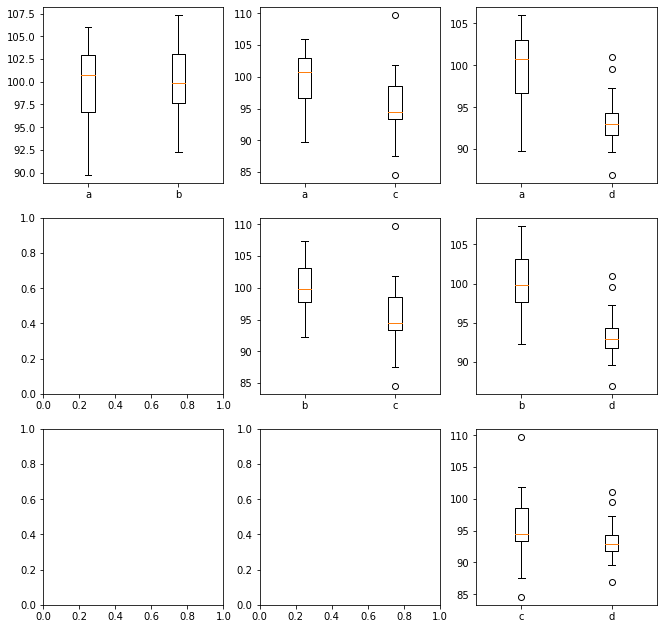

In [970]:
f, p = one_way_anova(df, 'group', 'value')

In [250]:
print(f, p)

6.35639456386063 0.0008731722558327215


# Двухфакторный

In [972]:
df_test = pd.read_csv('2way_clinic.csv')
df_test

,0,group1,group2
0,98.762932,y,high
1,96.966620,y,high
2,108.049369,y,high
3,101.706005,y,high
4,94.569880,y,high
...,...,...,...
59,104.764904,o,low
60,102.837722,o,low
61,104.884127,o,low
62,101.610925,o,low


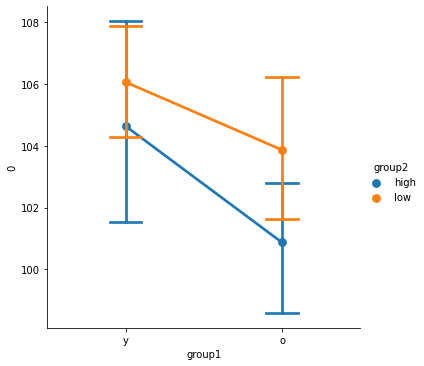

In [973]:
groups = ['group1', 'group2']
df_first = len(df_test[groups[0]].unique()) - 1

df_second = len(df_test[groups[1]].unique()) - 1

df_third = 1

first_group = df_test['group1'].unique()
second_group = df_test['group2'].unique()
average1 = []
average2 = []
average3 = []
group_sizes1 = []
group_sizes2 = []
group_sizes3 = []
for val in first_group:
    average1.append(df_test[df_test['group1'] == val].mean())
    group_sizes1.append(len(df_test[df_test['group1'] == val]))
average_global1 = sum(average1) / len(average1)

for val in second_group:
    average2.append(df_test[df_test['group2'] == val].mean())
    group_sizes2.append(len(df_test[df_test['group2'] == val]))
average_global2 = sum(average2) / len(average2)

average3 = []
for gr in first_group:
    for val in second_group:
        average3.append(df_test[(df_test['group1'] == gr) & (df_test['group2'] == val)].mean())
        group_sizes3.append(len(df_test[(df_test['group1'] == gr) & (df_test['group2'] == val)]))
average_global3 = sum(average3) / len(average3)

ssb1 = 0
ssb1 = group_sizes1[0] * (average1[0][0] - average_global1[0]) ** 2
ssb1 += group_sizes1[1] * (average1[1][0] - average_global1[0]) ** 2
ms_bg1 = ssb1 / df_first

ssb2 = 0
ssb2 = group_sizes2[0] * (average2[0][0] - average_global2[0]) ** 2
ssb2 += group_sizes2[1] * (average2[1][0] - average_global2[0]) ** 2
ms_bg2 = ssb2 / df_second

ssb3 = 0
for i in range(4):
    ssb3 += group_sizes3[i] * (average3[i] - average_global3) ** 2
ssb3 = ssb3[0]
ms_bg3 = ssb3 / df_third


def_global = len(df_test) - len(group_sizes1) - len(group_sizes2)

variances = []
group_sizes_global = []
for val in first_group:
    for gr in second_group:
        variances.append(df_test[(df_test['group1'] == val) & (df_test['group2'] == gr)].var())
        group_sizes_global.append(len(df_test[(df_test['group1'] == val) & (df_test['group2'] == gr)]))
variances = np.array(variances)

ssw = 0
for i in range(len(group_sizes_global)):
    ssw += (group_sizes_global[i] - 1) * variances[i]
ssw = ssw[0]
ms_wg = ssw / def_global

f_first = ms_bg1 / ms_wg
f_second = ms_bg2 / ms_wg
f_third = ms_bg3 / ms_wg
p_value1 = round(1 - stats.f.cdf(f_first, df_first, def_global), 5)
p_value2 = round(1 - stats.f.cdf(f_second, df_second, def_global), 5)
p_value3 = round(1 - stats.f.cdf(f_third, df_third, def_global), 5)
sns.catplot(x='group1', y='0', data=df_test, kind='point', hue='group2', capsize=0.2)
plt.savefig('anova.png', dpi=400, bbox_inches='tight')
plt.show()

In [975]:
print('F_age =', f_first, 'p_age =', p_value1, '\nF_dose =', f_second, 'p_dose =', p_value2, '\nF_agg =', f_third, 'p_agg', p_value3)

F_age = 5.368082124537378 p_age = 0.02394 
F_dose = 2.950426806296753 p_dose = 0.09101 
F_agg = 8.69154591528831 p_agg 0.00455


# Регрессионный анализ

# Многомерная

In [997]:
df = pd.read_csv('states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [162]:
def mult_linregr(df, groups, x):
    x = np.array(df[x])
    intercept = np.array([1 for i in range(len(df))])
    coeff = []
    for i in groups:
        coeff.append(df[i])
    g_t = [intercept]
    for gr in coeff:
        g_t.append(gr)
    g_t = np.array(g_t)
    g = g_t.transpose()
    a = list(map(lambda x: round(x, 3), 
                 (np.linalg.matrix_power(g_t.dot(g), -1).dot(g_t)).dot(x)))
    return a, groups
    
def test_model(df, x, model, group, alpha):
    x = np.array(df[x])
    model_values = []
    for i in range(len(df)):
        summ = model[0]
        for j in range(1, len(model)):
            summ += model[j] * df[group[j - 1]][i]
        model_values.append(summ)
    ssres = []
    for i in range(len(df)):
        ssres.append((model_values[i]-x[i])**2)
    ssres = sum(ssres)
    sstotal = []
    for i in range(len(df)):
        sstotal.append((x[i] - x.mean())**2)
    sstotal = sum(sstotal)
    r2 = 1 - ssres/sstotal
    r2_adj = 1 - (1 - r2) * (len(df) - 1) / (len(df) - len(group))
    ssfac = []
    for i in range(len(df)):
        ssfac.append((model_values[i] - x.mean())**2)
    sssfac = ssfac
    ssfac = sum(ssfac)
    f_value = ssfac * (len(df) - len(group) - 1) / (ssres * len(group))
    f_cr = stats.f.ppf(1 - alpha, len(group), len(df) - len(group) - 1)
    final_model = 'y_model = ' + str(model[0]) + ' +'
    for i in range(1, len(model)):
        final_model += ' (' + str(model[i]) + group[i-1] + ') +' 
    final_model = final_model[:len(final_model) - 2]
    if (f_value > f_cr) and (r2_adj > 0.5):
        print(final_model)
        print('F =', round(f_value, 4), '> F_cr =', round(f_cr, 4),
              ': passed')
        print('R_2adj =', round(r2_adj, 4), ': passed')
    else:
        print('Not passed')
        print('F =', round(f_value, 4), ', F_cr =', round(f_cr, 4))
        print('R_2adj =', round(r2_adj, 4))
    return sssfac

In [1033]:
model, group = mult_linregr(df, ['metro_res', 'female_house', 'white'], 'poverty')
test_model(df, 'poverty', model, group, 0.1)

Not passed
F = 11.5203 , F_cr = 2.2042
R_2adj = 0.3997


In [1036]:
model, group = mult_linregr(df, ['hs_grad', 'white'], 'poverty')
test_model(df, 'poverty', model, group, 0.1)

y_model = 64.945 + (-0.594hs_grad) + (-0.031white)
F = 32.6277 > F_cr = 2.4167 : passed
R_2adj = 0.5672 : passed


In [999]:
model, group = mult_linregr(df, ['metro_res', 'white'], 'poverty')
test_model(df, 'poverty', model, group, 0.1)

Not passed
F = 6.1693 , F_cr = 2.4167
R_2adj = 0.1877


In [1000]:
model, group = mult_linregr(df, ['hs_grad'], 'poverty')
test_model(df, 'poverty', model, group, 0.1)

y_model = 64.781 + (-0.621hs_grad)
F = 61.7647 > F_cr = 2.8108 : passed
R_2adj = 0.5578 : passed


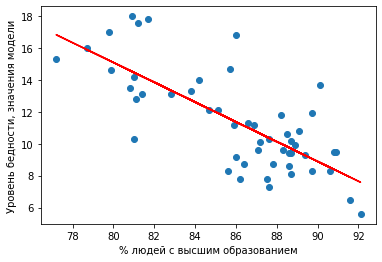

In [1024]:
x = np.array(df['hs_grad'])
y = np.array(df['poverty'])
y_test = np.array(64.781 - 0.621 * x)
plt.scatter(x, y)
plt.plot(x, y_test, c='r')
plt.xlabel('% людей с высшим образованием')
plt.ylabel('Уровень бедности, значения модели')
plt.savefig('lin_r.png', dpi=400, bbox_inches='tight')

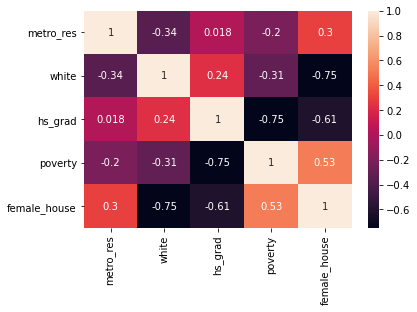

In [1029]:
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr_mlr.png', dpi=400, bbox_inches='tight')

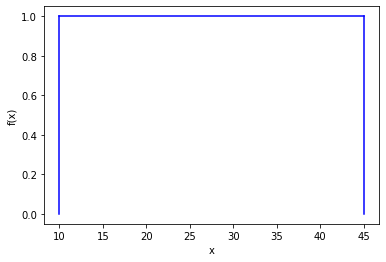

In [303]:
plt.plot([10, 10], [0, 1], [45, 45], [0, 1], [10, 45], [1, 1], color='b')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.savefig('to_r_mmp.png')

In [270]:
0.96+0.8+0.65+0.7+6*1

9.11

In [333]:
x = [i * 0.001 for i in range(1000)]
f = [0.4391 * math.exp(-0.4391 * x[i]) for i in range(1000)]

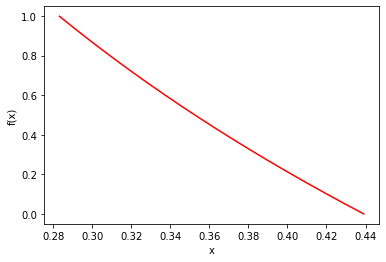

In [334]:
plt.plot(f, x, 'r-')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.savefig('to_exp_mmp.png')

In [287]:
x = [12,20,24,23,16,19,20,35,10,45]

In [292]:
m, d = pe_norm(x, 'm_d')
print(m, d)

22.400000000000002 110.93333333333332


In [295]:
a = m - (3 * d) ** (1 / 2)
b = m + (3* d) ** (1 / 2)

In [296]:
a

4.157193198413797

In [297]:
b

40.642806801586204

In [299]:
(3 * 110.93) ** (1/2)

18.242532718896246

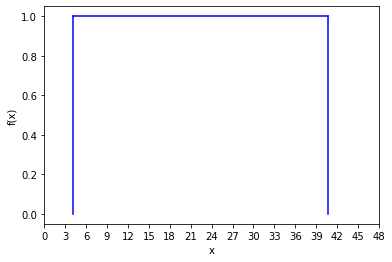

In [307]:
plt.plot([4.1572, 4.1572], [0, 1], [40.6428, 40.6428], [0, 1], [4.1572, 40.6428], [1, 1], color='b')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xticks([i for i in range(0,50, 3)])
plt.savefig('to_r_mm.png')

In [308]:
x = [0.96,0.8,0.65,0.7,1, 1, 1, 1, 1, 1]

In [318]:
m, d, sm, sd = pe_norm(x, 'both')

In [319]:
m

0.911

In [320]:
d

0.019432222222222215

In [312]:
1 / m

1.097694840834248

In [315]:
d ** (1/2)

0.13939950581771163

In [316]:
1 / 0.134

7.462686567164178

In [321]:
sm / m ** 4

0.0028212979962748326

In [323]:
sd / (4 * (d ** 3))

2.5730459145748767

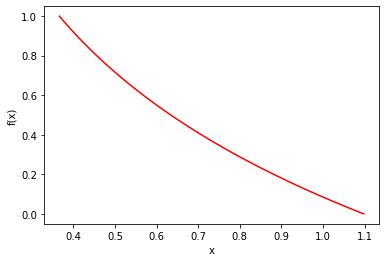

In [325]:
x = [i * 0.001 for i in range(1000)]
f = [1.0977 * math.exp(-1.0977 * x[i]) for i in range(1000)]
plt.plot(f, x, 'r-')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.savefig('to_exp_mm.png')

In [335]:
0.4391 ** 2 / 4

0.0482022025